<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> Import Necessaries</b>

In [1]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
modules loaded


<a id="3"></a>
## <b>3 <span style='color:#B21010'>||</span> EDA</b>

***Read Train and Test dataframes***

In [2]:
train_csv = pd.read_csv('./Training_set.csv')
test_csv = pd.read_csv('./Testing_set.csv')

***create necessary functions***

In [3]:
def shape_of_ds(df, ds_name='df'):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    
def check_null(df, ds_name='df'):
    print(f"Number of null values in the {ds_name} dataset: ")
    print(df.isnull().sum())

def unique_vals(df, ds_name='df'):
    print(f"Number of unique values in {ds_name} dataset: ")
    print(df.nunique())
    
def seperator(sep=50):
    print("-"*sep)

***show first 5 rows of the training and testing dataframes***

In [4]:
train_csv.head()

filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

In [5]:
test_csv.head()

filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg

***show the shape of the traning and testing dataframes***

In [6]:
shape_of_ds(train_csv, "Train")
shape_of_ds(test_csv, "Test")

Train dataset has 6499 rows and 2 columns
Test dataset has 2786 rows and 1 columns


***show the null values***

In [7]:
check_null(train_csv, 'Train')

Number of null values in the Train dataset: 
filename    0
label       0
dtype: int64


In [8]:
check_null(test_csv, 'Test')

Number of null values in the Test dataset: 
filename    0
dtype: int64


***show unique values***

In [9]:
unique_vals(train_csv, 'Train')

Number of unique values in Train dataset: 
filename    6499
label         75
dtype: int64


In [10]:
unique_vals(test_csv, 'Test')

Number of unique values in Test dataset: 
filename    2786
dtype: int64


***visualize null values***

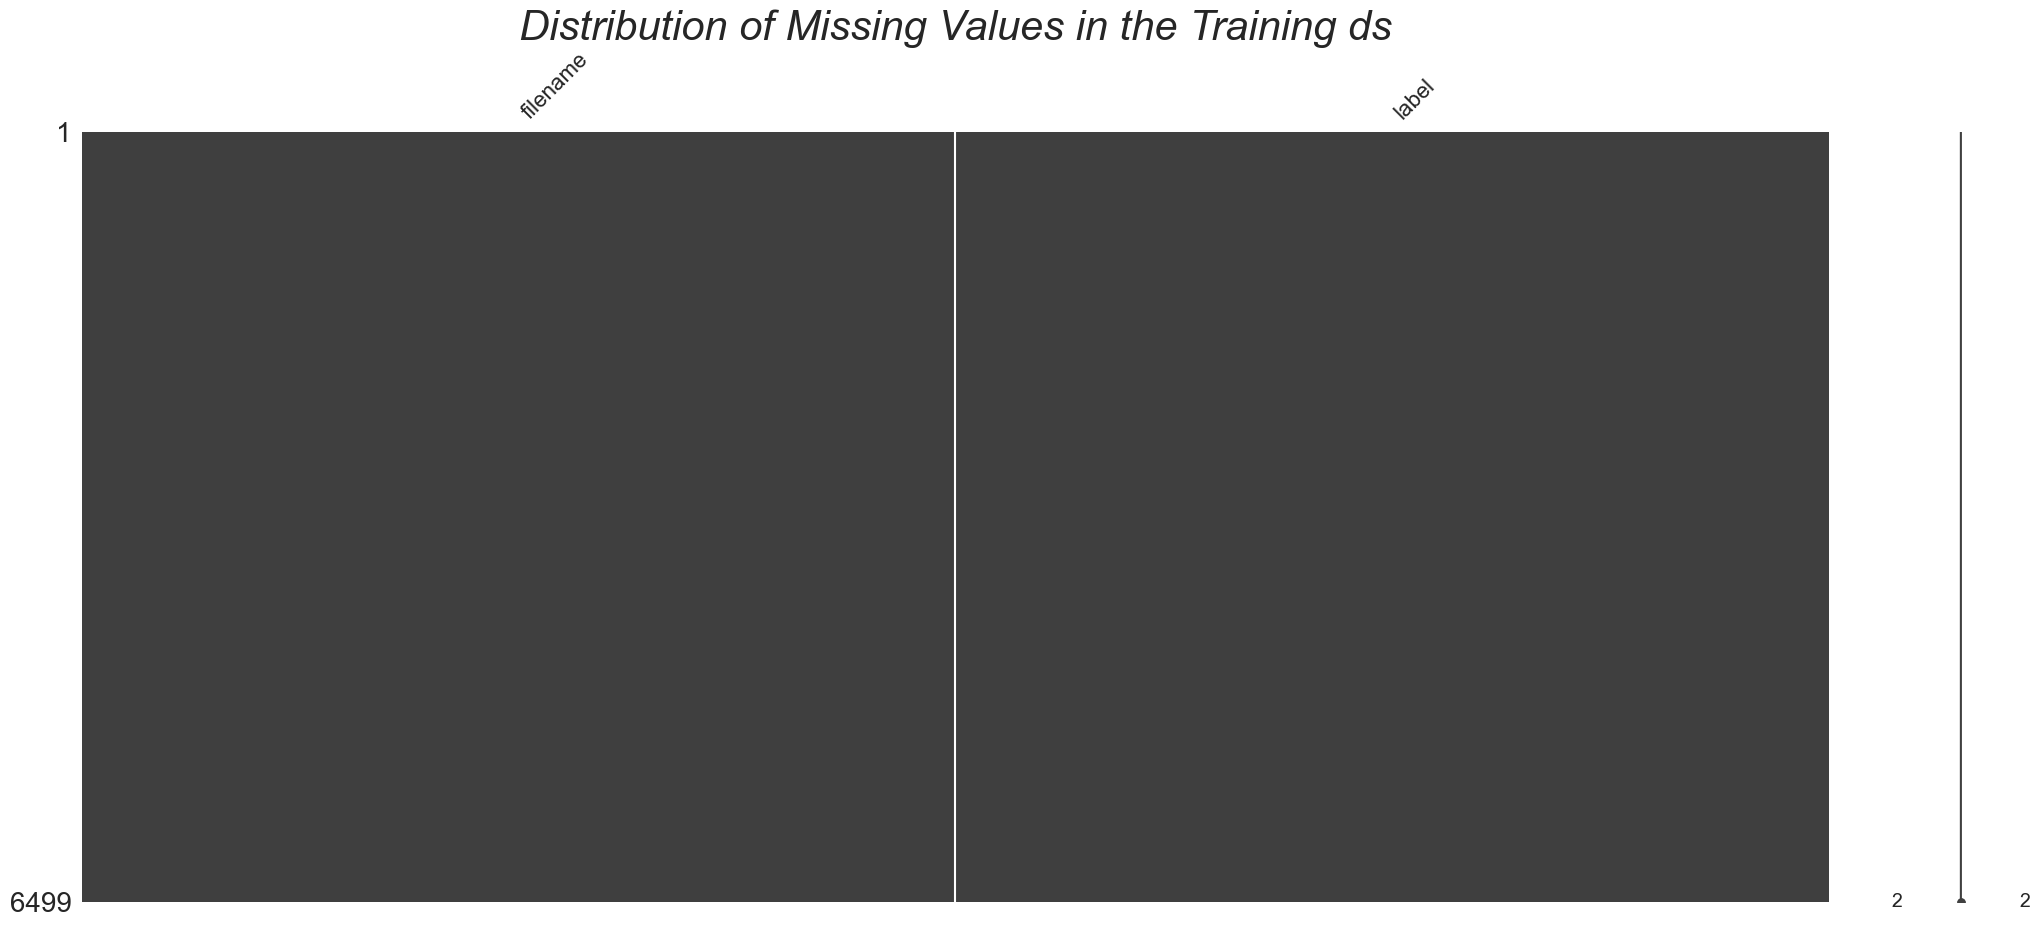

In [11]:
msno.matrix(train_csv)
plt.title('Distribution of Missing Values in the Training ds', fontsize=30, fontstyle='oblique');

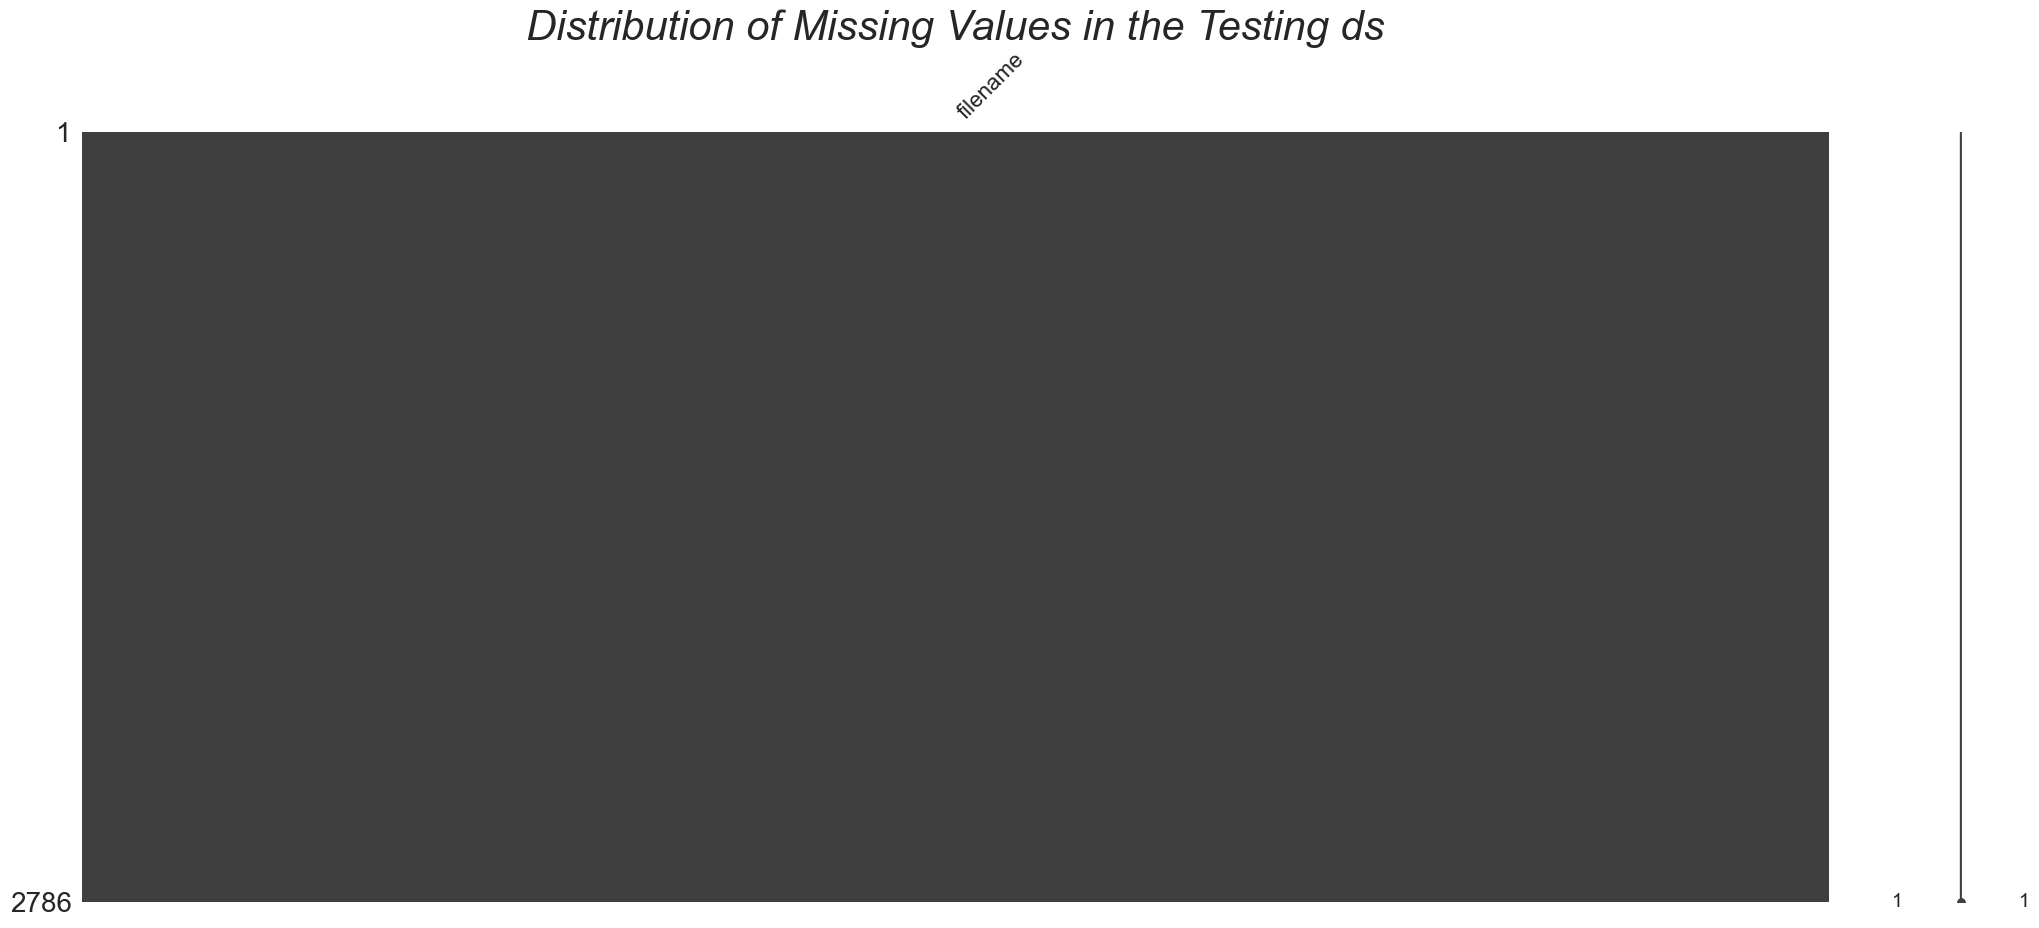

In [12]:
msno.matrix(test_csv)
plt.title('Distribution of Missing Values in the Testing ds', fontsize=30, fontstyle='oblique');

In [13]:
train_csv['filename'] = './dataset/train/' + train_csv['filename']
test_csv['filename'] = './dataset/test/' + test_csv['filename']

<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span> Split the Training dataset</b>


In [14]:
train_size = 0.75
train_df, valid_df = train_test_split(train_csv,  train_size= train_size, shuffle= True, random_state= 123)

In [15]:
train_df.head()

filename               label
5575  ./dataset/train/Image_5576.jpg   COMMON WOOD-NYMPH
1302  ./dataset/train/Image_1303.jpg       INDRA SWALLOW
3222  ./dataset/train/Image_3223.jpg   TROPICAL LEAFWING
3374  ./dataset/train/Image_3375.jpg  CHECQUERED SKIPPER
1094  ./dataset/train/Image_1095.jpg    BLACK HAIRSTREAK

In [16]:
valid_df.head()

filename                     label
2482  ./dataset/train/Image_2483.jpg            MOURNING CLOAK
5148  ./dataset/train/Image_5149.jpg      EASTERN DAPPLE WHITE
941    ./dataset/train/Image_942.jpg  GREEN CELLED CATTLEHEART
970    ./dataset/train/Image_971.jpg             DANAID EGGFLY
4899  ./dataset/train/Image_4900.jpg        EASTERN PINE ELFIN

In [17]:
shape_of_ds(train_df, "Train")
shape_of_ds(valid_df, "Valid")

Train dataset has 4874 rows and 2 columns
Valid dataset has 1625 rows and 2 columns


In [18]:
check_null(train_df, 'Train')

Number of null values in the Train dataset: 
filename    0
label       0
dtype: int64


In [19]:
check_null(valid_df, 'valid')

Number of null values in the valid dataset: 
filename    0
label       0
dtype: int64


In [20]:
unique_vals(train_df, 'Train')

Number of unique values in Train dataset: 
filename    4874
label         75
dtype: int64


In [21]:
unique_vals(valid_df, 'valid')

Number of unique values in valid dataset: 
filename    1625
label         75
dtype: int64


In [22]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.show()

In [23]:
train_order = train_df['label'].value_counts()
train_order

label
MOURNING CLOAK               90
ORANGE TIP                   81
SCARCE SWALLOW               81
EASTERN PINE ELFIN           80
BROWN SIPROETA               76
                             ..
MALACHITE                    52
CRIMSON PATCH                52
AFRICAN GIANT SWALLOWTAIL    51
WOOD SATYR                   51
ELBOWED PIERROT              50
Name: count, Length: 75, dtype: int64

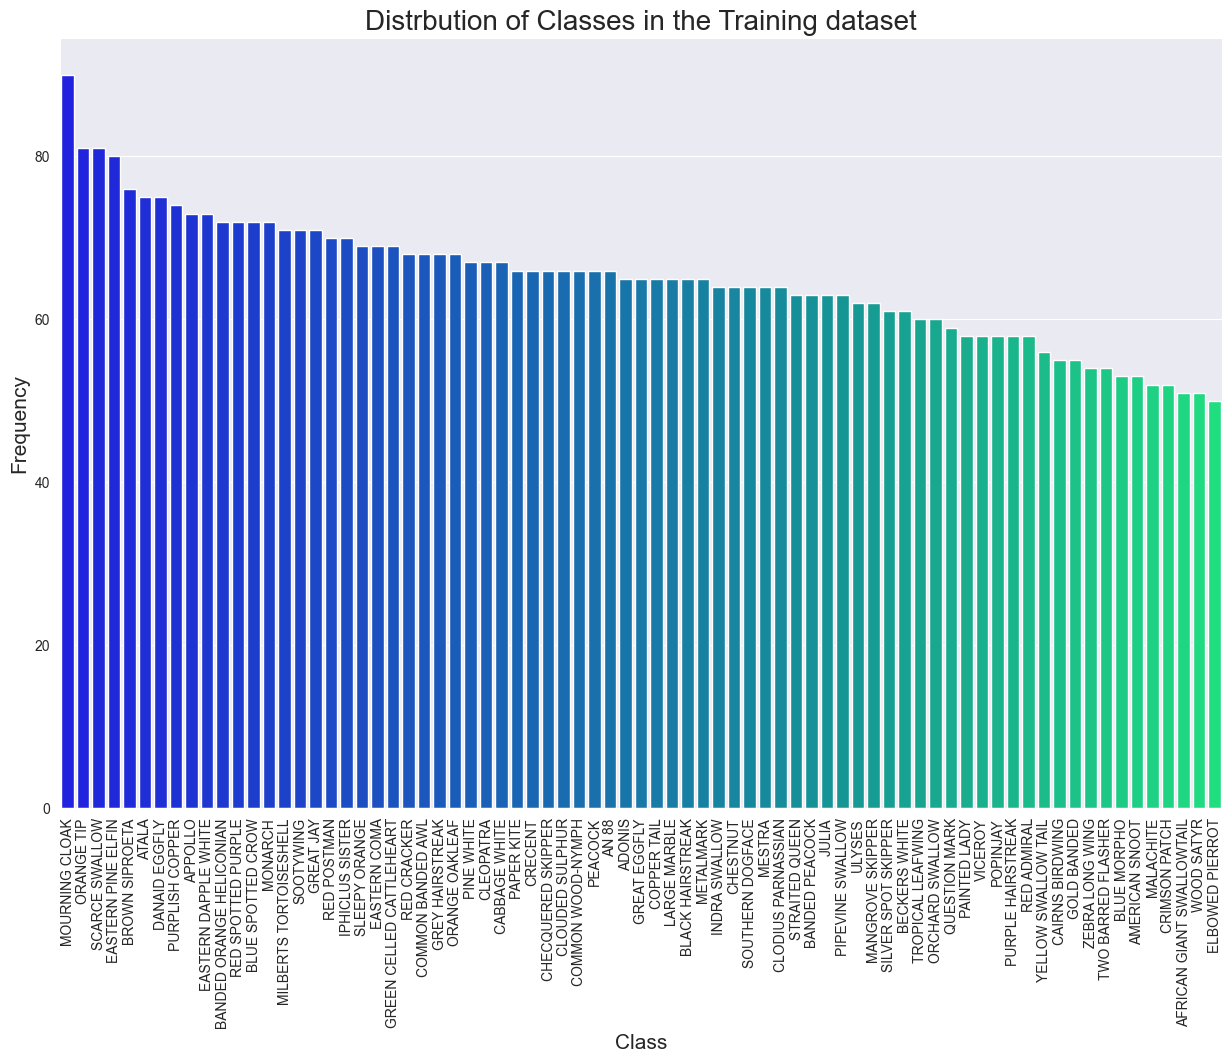

In [24]:
x = train_df['label']
count_plot(x, train_df, "Distrbution of Classes in the Training dataset", 'Class', 'Frequency', 15,10, order = train_order.index, rotation=True)

In [25]:
valid_order = valid_df['label'].value_counts()
valid_order

label
MOURNING CLOAK        41
SLEEPY ORANGE         38
ELBOWED PIERROT       32
CRECENT               31
CHECQUERED SKIPPER    29
                      ..
EASTERN PINE ELFIN    15
RED SPOTTED PURPLE    14
BLUE SPOTTED CROW     14
GREAT EGGFLY          13
METALMARK             11
Name: count, Length: 75, dtype: int64

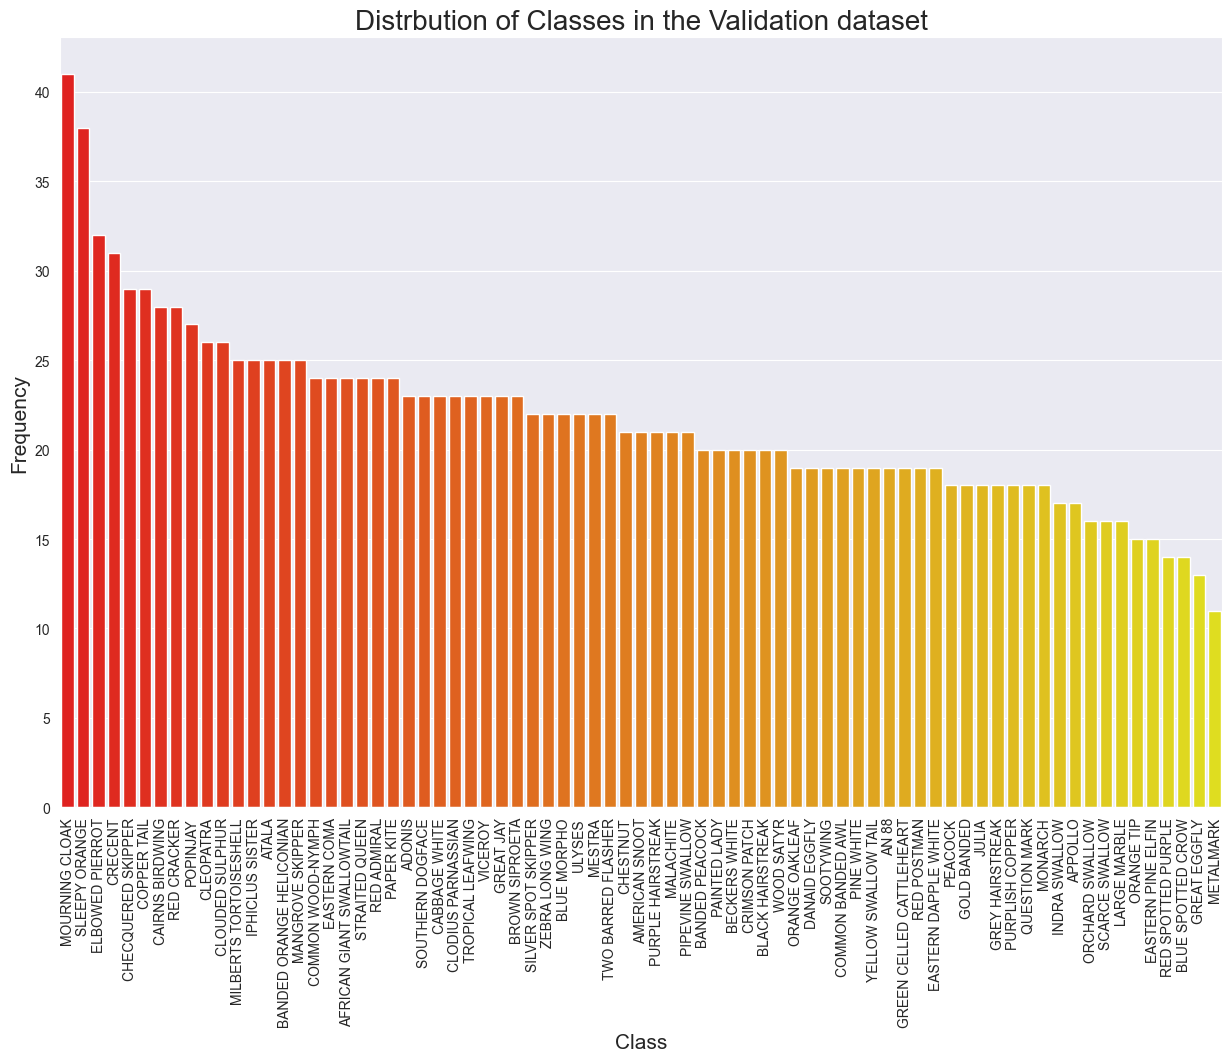

In [26]:
x = valid_df['label']
count_plot(x, valid_df, "Distrbution of Classes in the Validation dataset", 'Class', 'Frequency', 15,10, order = valid_order.index, rotation=True, palette='autumn')

In [27]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_csv)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

print(ts_length)
print(test_batch_size)
print(test_steps)

2786
14
199


In [28]:
train_df['filename'][0]

'./dataset/train/Image_1.jpg'

In [39]:
# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                            rotation_range=40,
                            width_shift_range=0.3,
                            height_shift_range=0.2,
                            brightness_range=None,
                            shear_range=0.1,
                            zoom_range=0.3,
                            channel_shift_range=0.4)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                            rotation_range=40,
                            width_shift_range=0.3,
                            height_shift_range=0.2,
                            brightness_range=None,
                            shear_range=0.1,
                            zoom_range=0.3,
                            channel_shift_range=0.4)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                        x_col= 'filename', 
                                        y_col= 'label', 
                                        target_size= img_size, 
                                        class_mode= 'categorical',
                                        color_mode= 'rgb', 
                                        shuffle= False, 
                                        batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'filename', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= False, 
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false





Found 4874 validated image filenames belonging to 75 classes.
Found 1625 validated image filenames belonging to 75 classes.


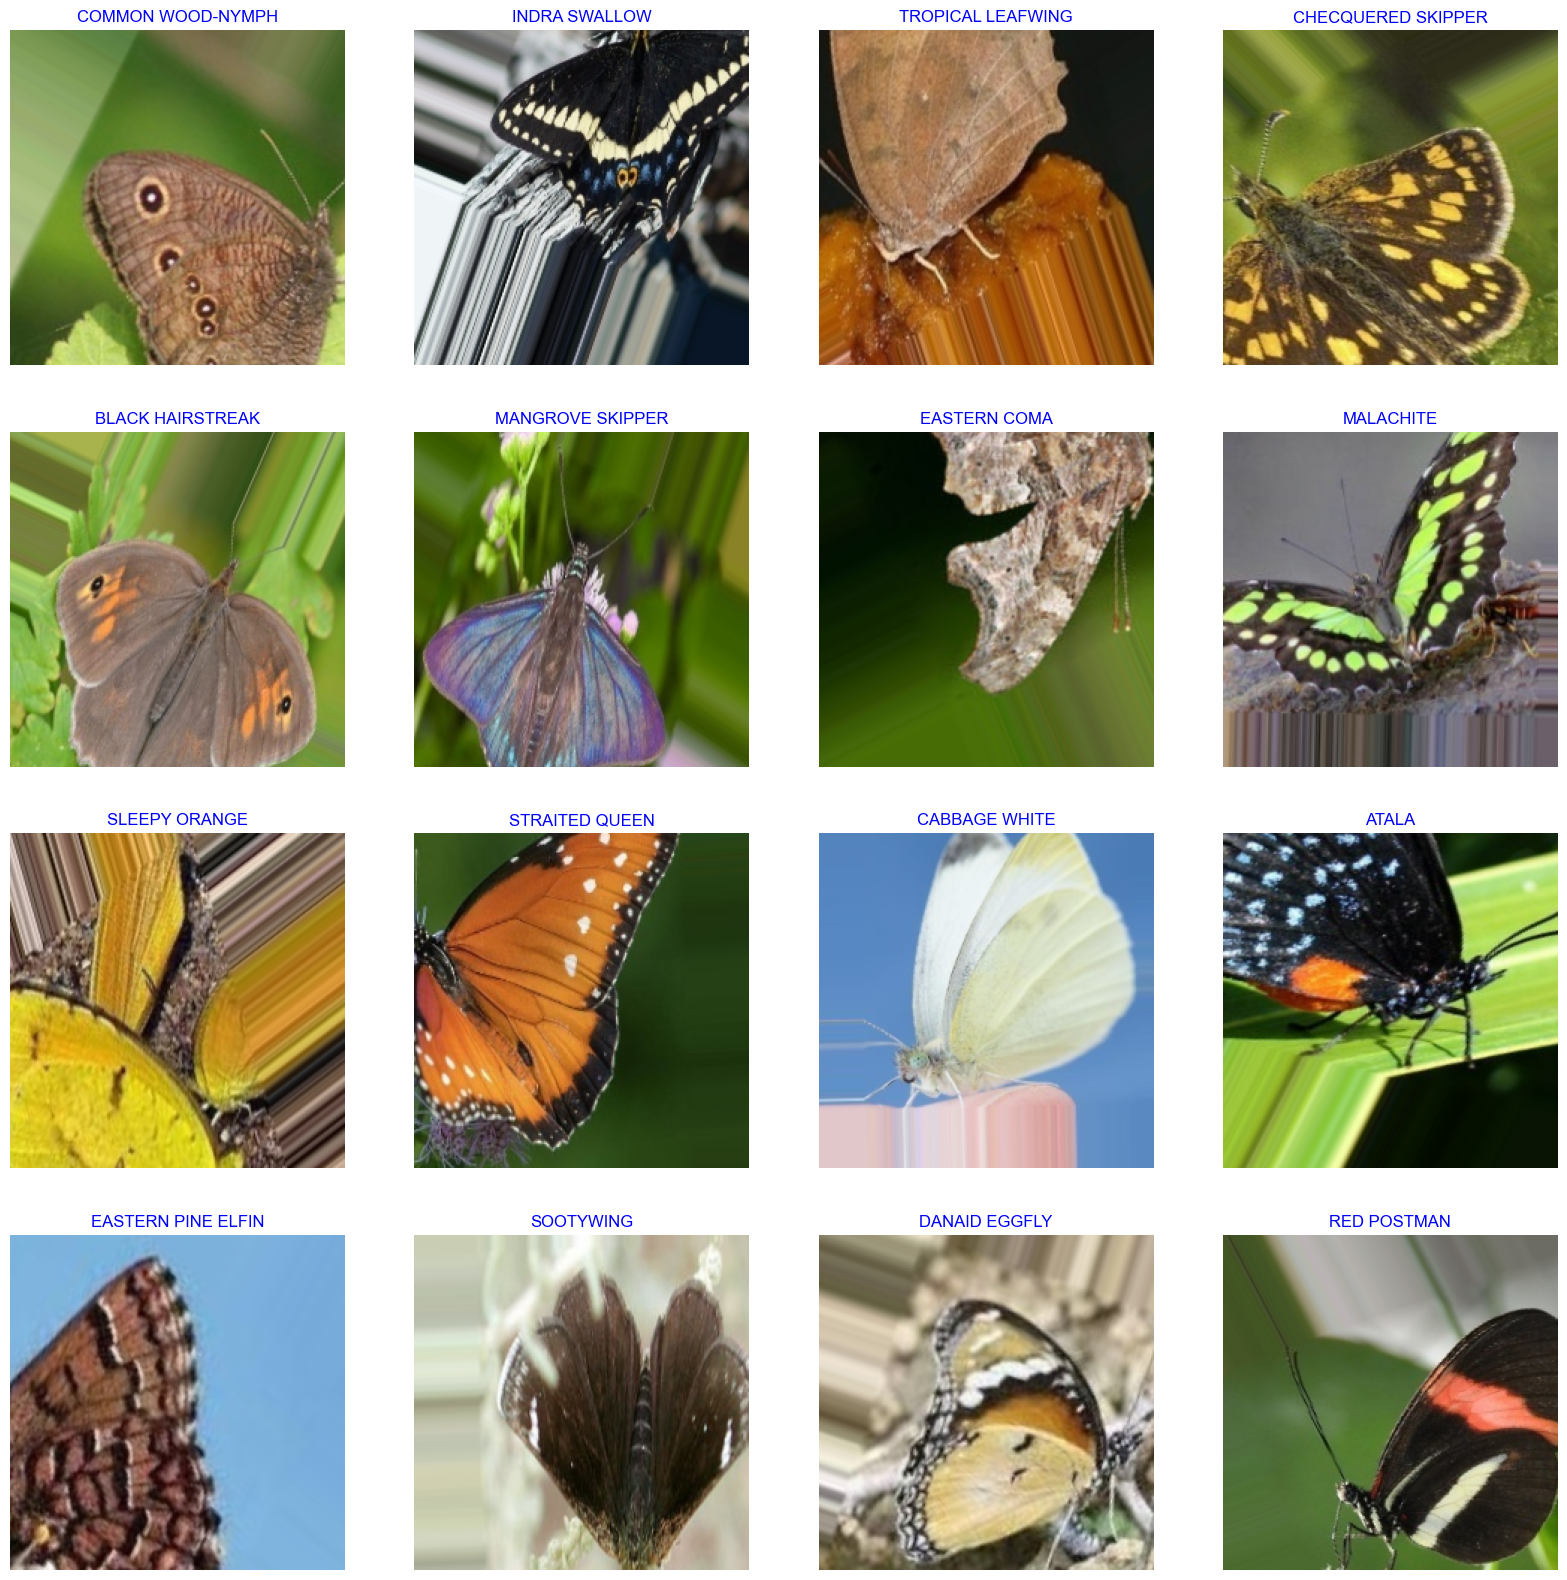

In [30]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [31]:
# Create Model Structure
#from keras.applications import EfficientNetB0
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
#base_model = efc.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
#base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(512, activation = 'relu'),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])
model.build([None, 224, 224, 3])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 75)                1

In [32]:
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               restore_best_weights=True,
                               mode='max',
                              )

def step_decay(epoch):
    
     initial_lrate = 0.1
     drop = 0.5
     epochs_drop = 10.0
     lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
     return lrate

lr_scheduler = LearningRateScheduler(step_decay)


In [33]:
batch_size = 16   # set batch size for training
epochs = 10   # number of all epochs in training

history = model.fit(x= train_gen, 
                    epochs= epochs, 
                    verbose= 1, 
                    validation_data= valid_gen, 
                    validation_steps= None, 
                    shuffle= False,
                    batch_size = batch_size,
                    callbacks=[early_stopping])


Epoch 1/10
305/305 [==============================] - 5268s 17s/step - loss: 7.7150 - accuracy: 0.3110 - val_loss: 5.0884 - val_accuracy: 0.7637
Epoch 2/10
305/305 [==============================] - 4993s 16s/step - loss: 4.6300 - accuracy: 0.7405 - val_loss: 3.6370 - val_accuracy: 0.8597
Epoch 3/10
305/305 [==============================] - 5060s 17s/step - loss: 3.3042 - accuracy: 0.8732 - val_loss: 2.7727 - val_accuracy: 0.9040
Epoch 4/10
305/305 [==============================] - 4966s 16s/step - loss: 2.4826 - accuracy: 0.9190 - val_loss: 2.2120 - val_accuracy: 0.9028
Epoch 5/10
305/305 [==============================] - 4964s 16s/step - loss: 1.9294 - accuracy: 0.9471 - val_loss: 1.8038 - val_accuracy: 0.9120
Epoch 6/10
305/305 [==============================] - 4990s 16s/step - loss: 1.5427 - accuracy: 0.9569 - val_loss: 1.4533 - val_accuracy: 0.9280
Epoch 7/10
305/305 [==============================] - 4841s 16s/step - loss: 1.2624 - accuracy: 0.9686 - val_loss: 1.2661 - val_ac

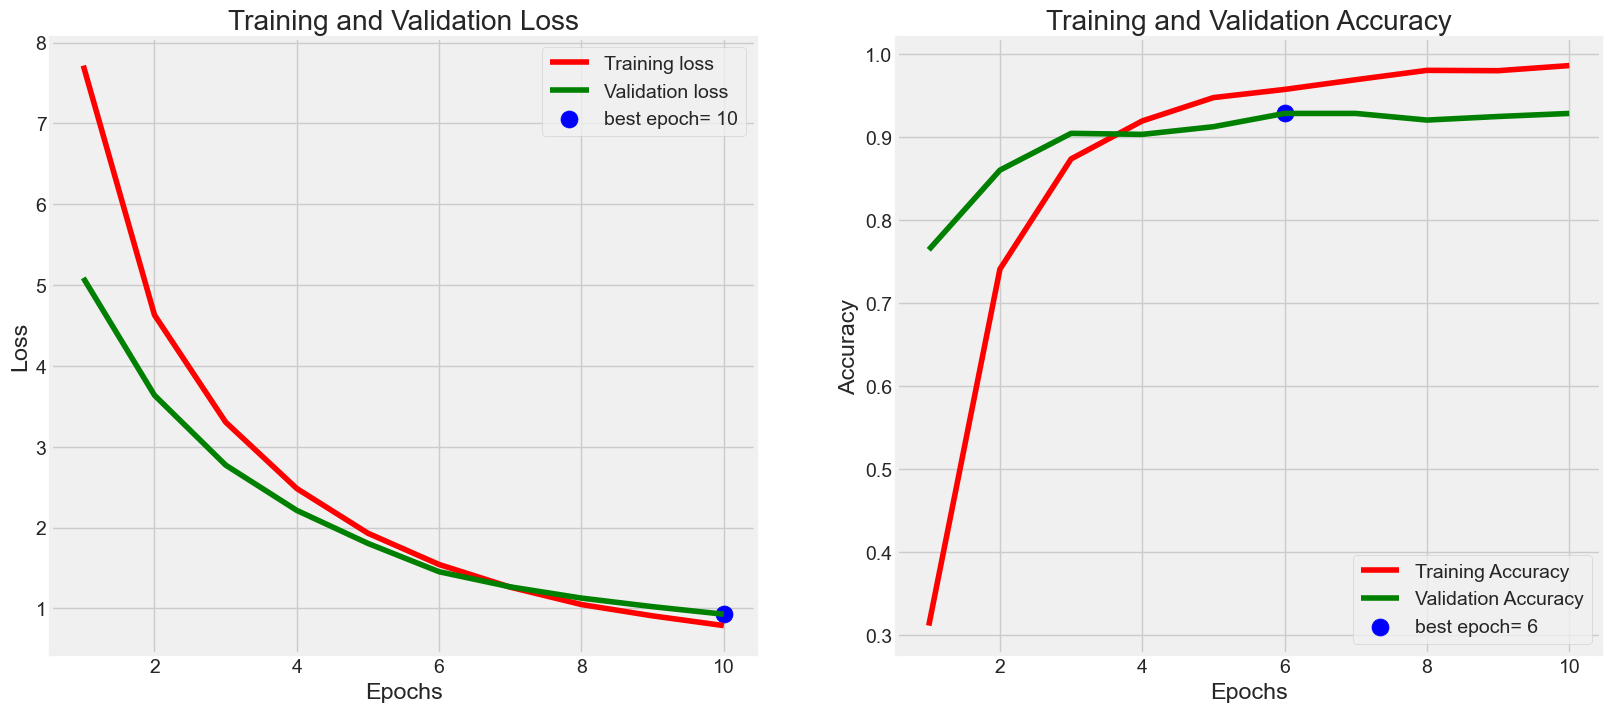

In [34]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [35]:
train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])

199/199 [==============================] - 283s 1s/step - loss: 0.9206 - accuracy: 0.9348
Train Loss:  0.6957380771636963
Train Accuracy:  0.9783291220664978
--------------------
Validation Loss:  0.9206041693687439
Validation Accuracy:  0.9347692131996155


In [37]:
model.save("butterfly_efficientnet.h5")

In [53]:
test_csv['filename'][0]

'./dataset/test/Image_1.jpg'

In [65]:
test_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'filename', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= False, 
                                       batch_size= batch_size)

Found 1625 validated image filenames belonging to 75 classes.


In [82]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f'test accuracy : {test_accuracy * 100:.2f}%')

102/102 [==============================] - 304s 3s/step - loss: 0.9326 - accuracy: 0.9305
test accuracy : 93.05%


In [67]:
def F1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [83]:
from sklearn.metrics import f1_score
def predictor(test_gen):    
    y_pred= []
    error_list=[]
    error_pred_list = []
    y_true=test_gen.labels
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, verbose=1)
    tests=len(preds)    
    for i, p in enumerate(preds):        
        pred_index=np.argmax(p)         
        true_index=test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors=errors + 1
            file=test_gen.filenames[i]
            error_list.append(file)
            error_class=classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc=( 1-errors/tests) * 100
    msg=f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}'
    print(msg) # cyan foreground
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    if class_count <=75:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(500, 500))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests, error_list, error_pred_list, f1score

errors, tests, error_list, error_pred_list, f1score =predictor(test_gen)

102/102 [==============================] - 296s 3s/step
there were 111 errors in 1625 tests for an accuracy of  93.17


Classification Report:
----------------------
                            precision    recall  f1-score   support

                   ADONIS     0.9565    0.9565    0.9565        23
AFRICAN GIANT SWALLOWTAIL     1.0000    0.9583    0.9787        24
           AMERICAN SNOOT     0.9524    0.9524    0.9524        21
                    AN 88     1.0000    1.0000    1.0000        19
                  APPOLLO     1.0000    0.9412    0.9697        17
                    ATALA     1.0000    0.9600    0.9796        25
 BANDED ORANGE HELICONIAN     0.9615    1.0000    0.9804        25
           BANDED PEACOCK     1.0000    1.0000    1.0000        20
            BECKERS WHITE     0.8947    0.8500    0.8718        20
         BLACK HAIRSTREAK     1.0000    0.8500    0.9189        20
              BLUE MORPHO     0.9167    1.0000    0.9565        22
        BLUE SPOTTED CROW     0.7647    0.9286    0.8387        14
           BROWN SIPROETA     1.0000    0.9565    0.9778        23
            CA